In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Kochi.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Ifthar,350,Kerala,Kochi,Edappally,Casual Dining,8am to 2am(Mon-Sun),Very Good,4.1,771
1,Ali Baba & 41 Dishes,500,"Kerala,South Indian,Chinese,Biryani",Kochi,Panampilly Nagar,Casual Dining,12noon to 1130pm(Mon-Sun),Good,3.8,560
2,Dhe Puttu,600,Kerala,Kochi,Edappally,Casual Dining,12noon to 1130pm(Mon-Sun),Very Good,4.3,1161
3,Cafe d' arabia,500,"Arabian,Lebanese",Kochi,Edappally,Casual Dining,10am to 12midnight(Mon-Sun),Very Good,4.1,542
4,Real Arabia,300,"Arabian,Chinese,North Indian",Kochi,Ravipuram,Quick Bites,1230pm to 12midnight(Mon-Sun),Very Good,4.0,382


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
Name                736 non-null object
Price               736 non-null int64
Cuisine_Category    736 non-null object
City                736 non-null object
Region              736 non-null object
Cuisine_Type        736 non-null object
Timing              724 non-null object
Rating_Types        736 non-null object
Rating              736 non-null float64
Votes               736 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 57.6+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,736.000000,736.000000,736.000000
mean,392.135870,3.475000,90.214674
std,216.487898,0.435437,148.518004
min,0.000000,2.200000,4.000000
25%,250.000000,3.200000,13.000000
50%,350.000000,3.500000,33.000000
75%,500.000000,3.800000,102.000000
max,1600.000000,4.900000,1476.000000


In [7]:
data.isna().sum()

Name                 0
Price                0
Cuisine_Category     0
City                 0
Region               0
Cuisine_Type         0
Timing              12
Rating_Types         0
Rating               0
Votes                0
dtype: int64

In [8]:
data.Name.value_counts().head()

Ambiswamy's             4
Masafi Restaurant       3
Burger Hutz             3
Hotel Sree Abhirami     3
Timur Kachi Biriyani    3
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Kakkanad            111
Edappally            69
Kaloor               57
Palarivattom         47
Panampilly Nagar     31
MG Road              31
Vyttila              31
Kalamassery          30
Kacheripady          29
Aluva                27
Name: Region, dtype: int64

Text(0.5,1,'Region')

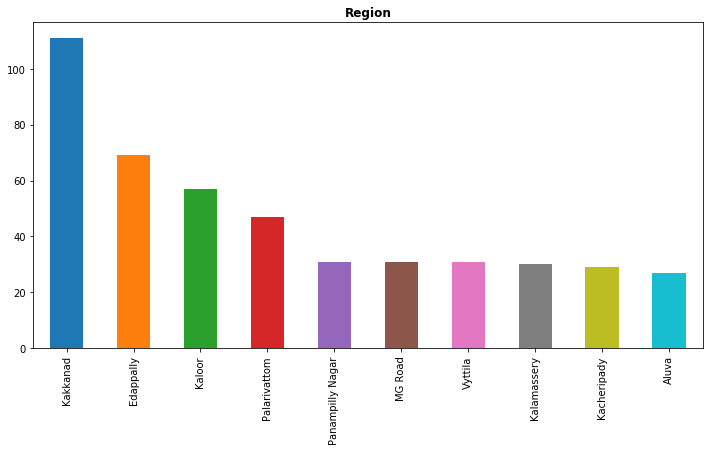

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

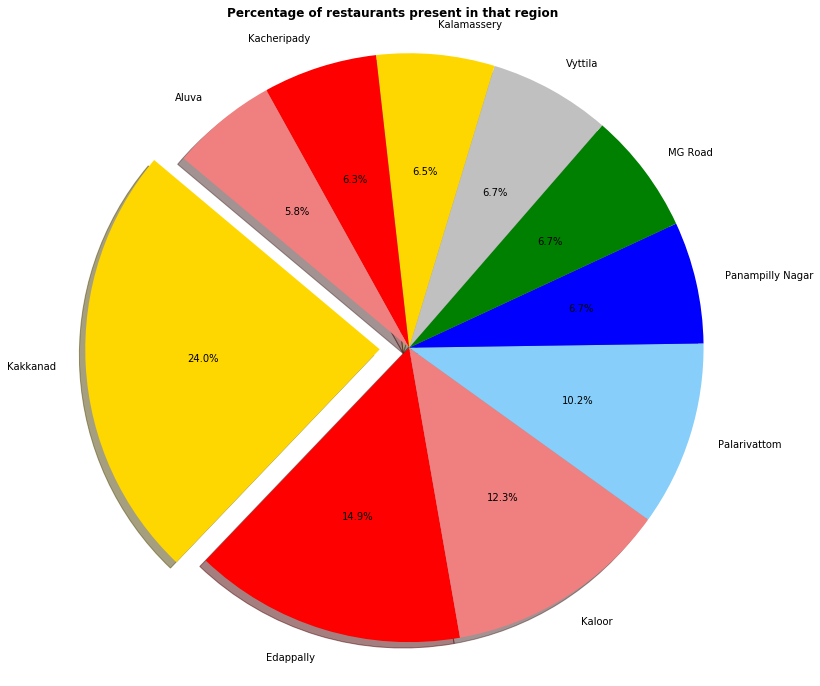

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      351
Good         278
Very Good     88
Excellent     11
Poor           7
İyi            1
Name: Rating_Types, dtype: int64

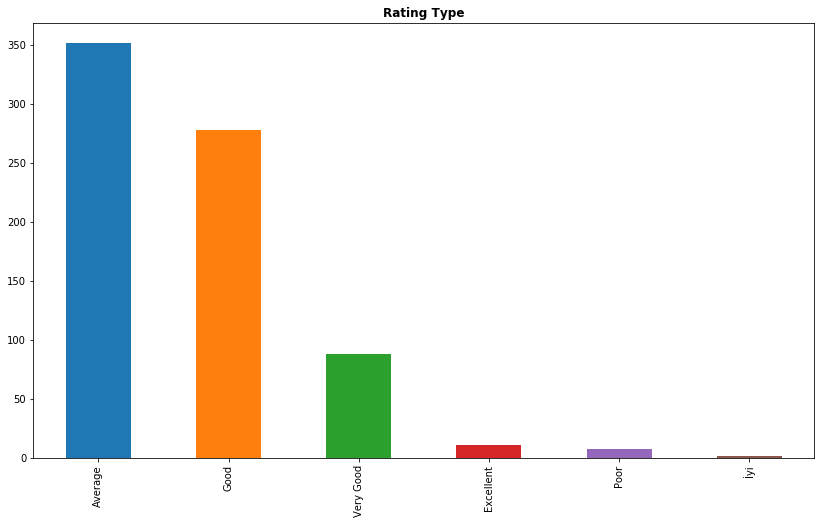

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       291
Casual Dining     280
Café               57
Dessert Parlor     31
Bakery             23
Beverage Shop      22
none               12
Food Court          7
Sweet Shop          5
Fine Dining         2
Name: Cuisine_Type, dtype: int64

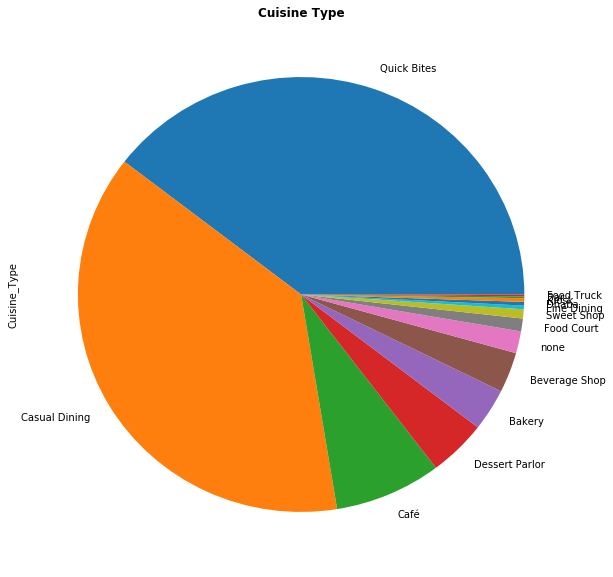

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites and Casual Dining

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.473756906077351


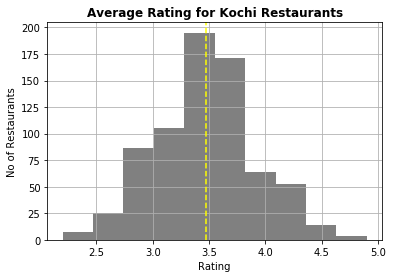

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Kochi Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Kochi is found to be around 3.47

# Top cuisines in Kochi

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

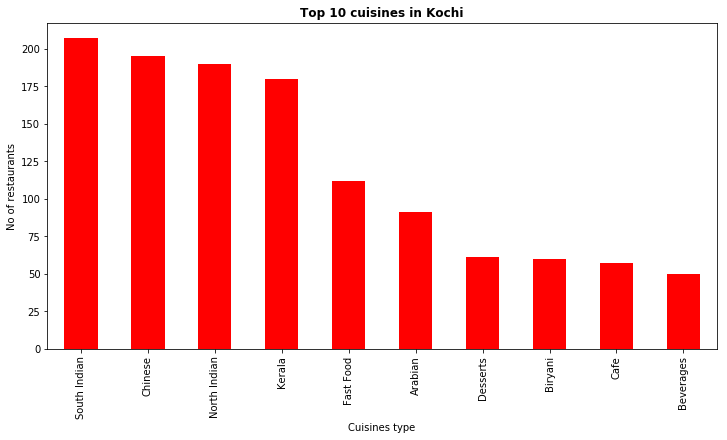

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Kochi',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

300     126
400     114
200     103
500      89
250      78
150      32
350      30
600      28
450      28
800      17
1000     14
700      14
100       9
900       8
550       8
650       6
0         4
1200      3
750       3
950       2
Name: Price, dtype: int64

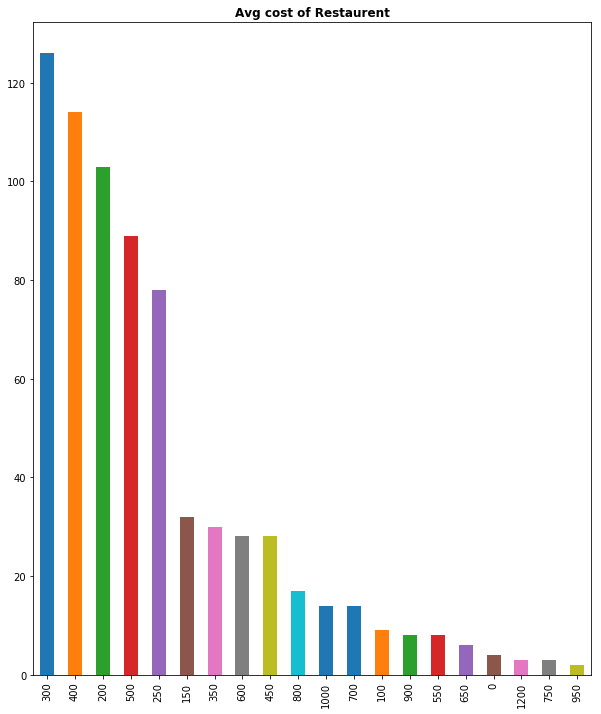

In [25]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

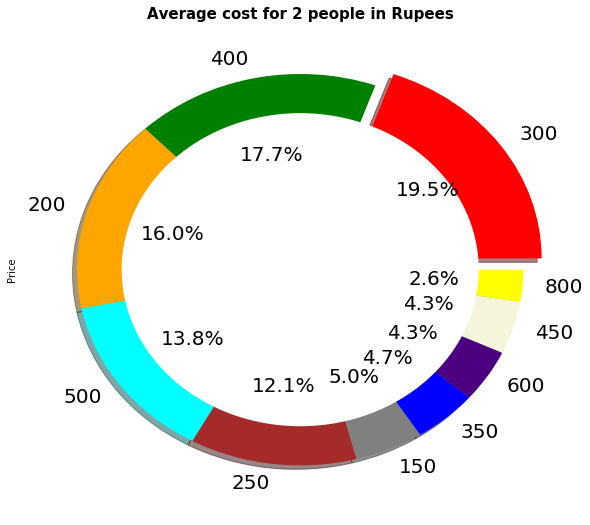

In [27]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300